In [ ]:
!pip install pydicom

In [ ]:
!pip install np_utils

In [1]:
import pydicom
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf

In [2]:
#Reading Files:

data_dir = "../train"
patients = os.listdir(data_dir)
labels_df = pd.read_csv("../train_labels.csv")
label=labels_df.loc[:,'MGMT_value']
scan = ["FLAIR","T1w","T1wCE","T2w"]
labels_df.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [3]:
i=0
for patient in patients[:10]:
#     label = labels_df._get_value(patient,"")
    path = data_dir + '/'+ patient + "/" + scan[0]
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[0]))
    print(len(slices),label[i],slices[i].pixel_array.shape)
    i+=1
#     print(slices[0])

400 1 (512, 512)
129 1 (512, 512)
129 0 (512, 512)
400 1 (512, 512)
129 1 (512, 512)
168 1 (512, 512)
240 0 (512, 512)
129 1 (512, 512)
400 1 (512, 512)
216 1 (512, 512)


In [ ]:
len(patients)

In [4]:
#FUNCTIONS WE USE:
l=[1,2,3,4,5,6,7,8,9]
def chunk(l,n):
    for i in range(0,len(l),n):
        yield l[i:i+n]

print(list(chunk(l,3)))
        
        
def mean(l):
    return sum(l)/len(l)

def resize(layer,HM_slices):
    if(len(layer)<HM_slices and HM_slices-len(layer)>1):
        layer.append(layer[-1])
        return resize(layer,HM_slices)
    elif(len(layer)<HM_slices and HM_slices-len(layer)==1):
        layer.append(layer[-1])
        return layer
    else:
        return layer
    
    
    
def process_data(patients, label_df, IMG_PX_SIZE = 50,HM_slices=20, visual=False, i=0):
    path = data_dir + '/'+ patient + "/" + scan[scan_type]
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[0]))
    i+=1

       
    new_slices = []

    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]

    chunk_sizes =  math.ceil(len(slices)/HM_slices)

    for slice_chunk in chunk(slices, chunk_sizes):
            slice_chunk = list(map(mean,zip(*slice_chunk)))
            new_slices.append(slice_chunk)

    new_slices=resize(new_slices,HM_slices)
    len(new_slices)
        
    if visual:
        fig = plt.figure()
        for num,each_slice in enumerate(new_slices):
            y = fig.add_subplot(4,5,num+1)
            y.imshow(each_slice,cmap='gray')
        #         y.imshow(each_slice)
        plt.show()
            
    if label[i]==1: label[i]=np.array([0,1])
    elif label[i]==0: label[i]=np.array([1,0])

    return np.array(new_slices), label [i]
        

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


<ipython-input-14-1997fe24095f>:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


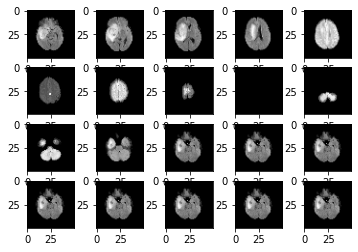

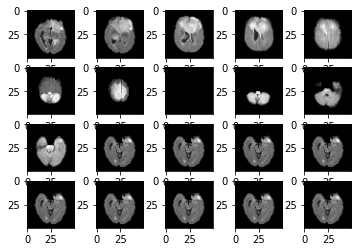

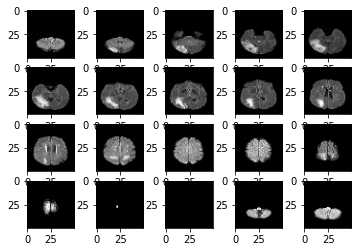

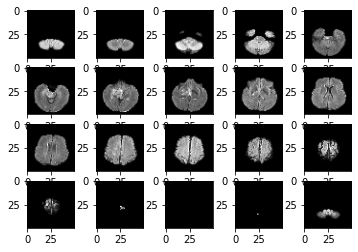

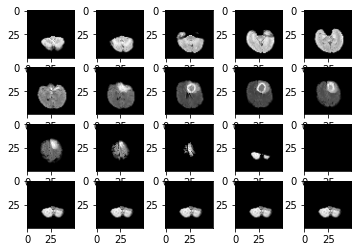

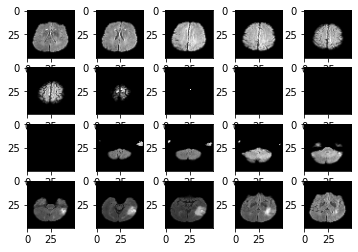

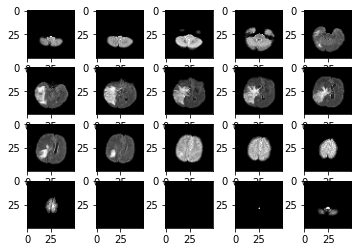

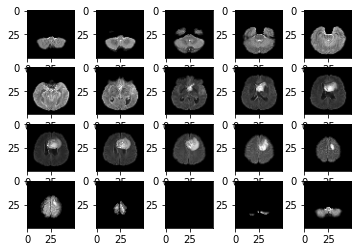

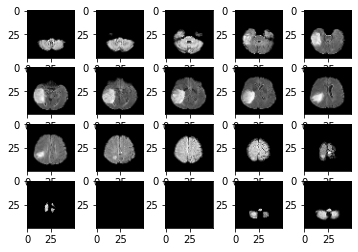

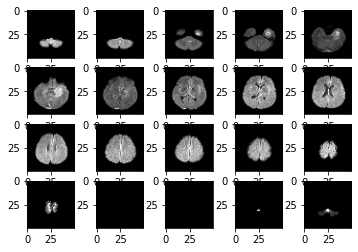

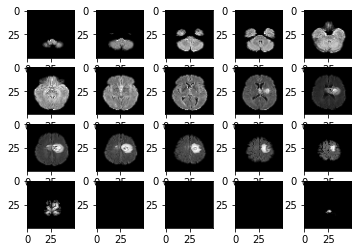

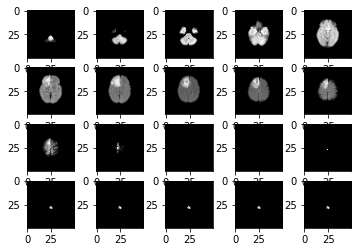

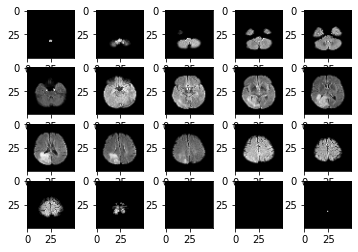

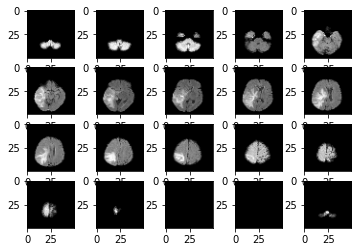

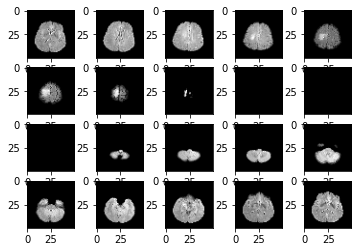

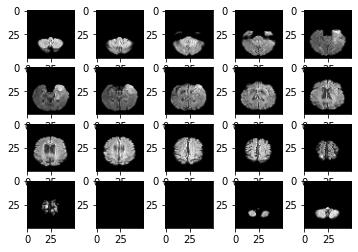

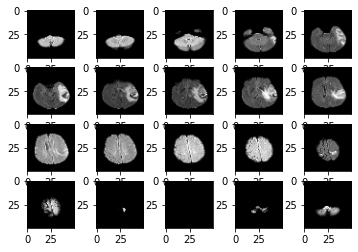

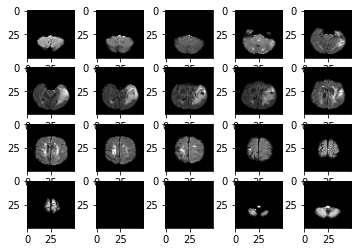

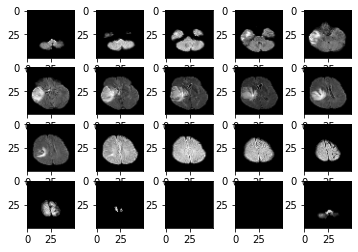

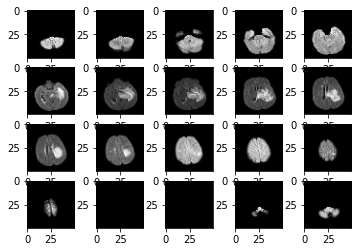

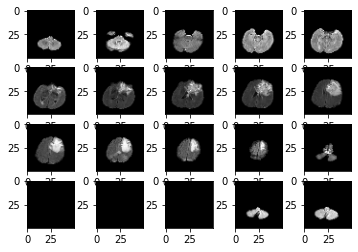

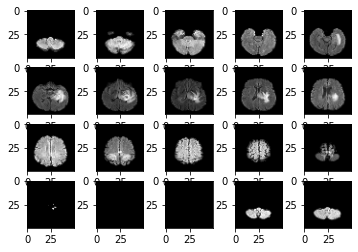

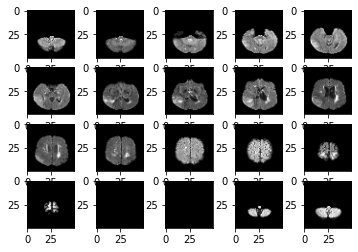

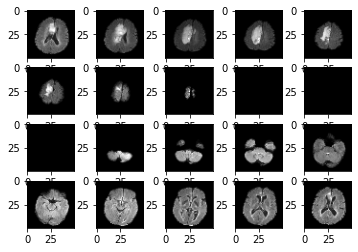

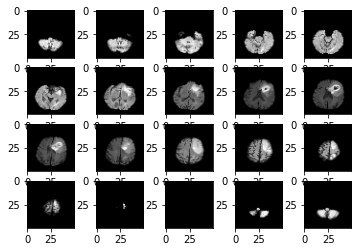

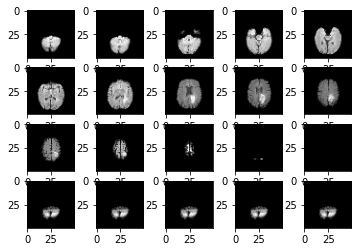

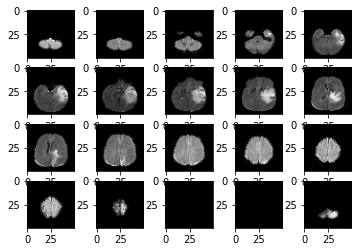

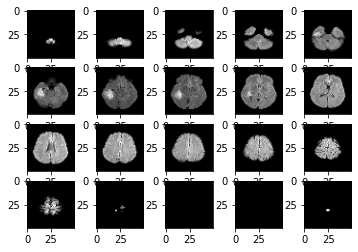

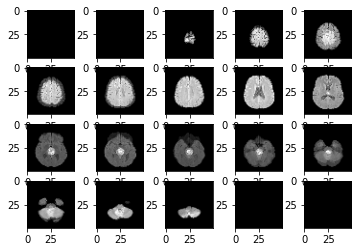

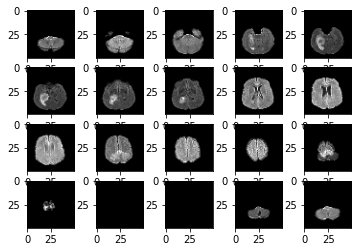

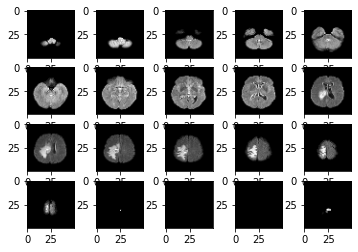

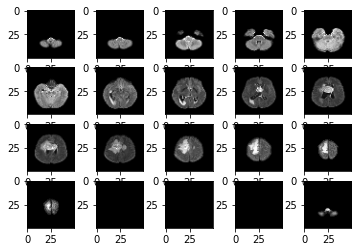

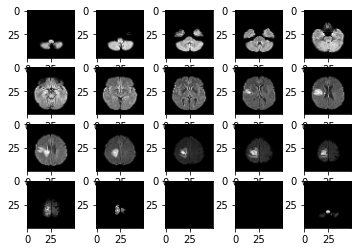

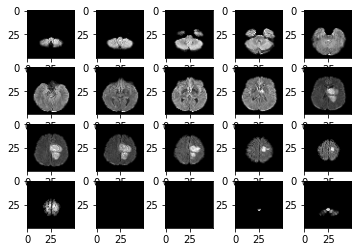

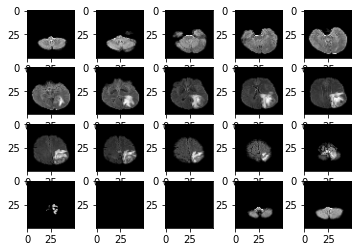

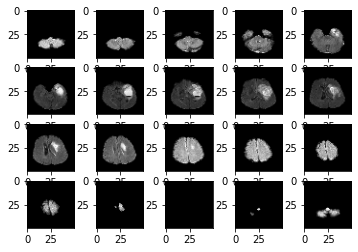

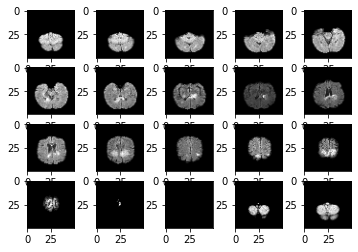

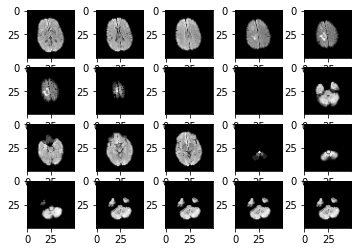

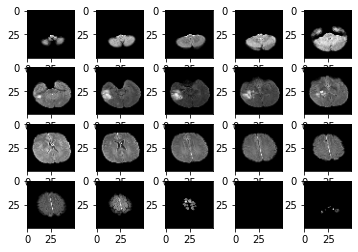

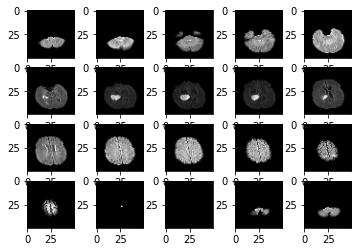

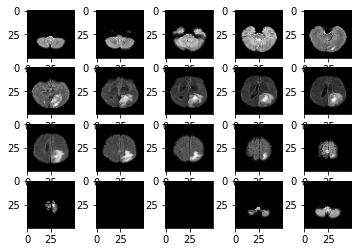

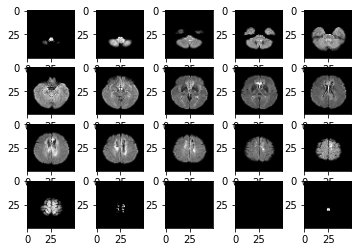

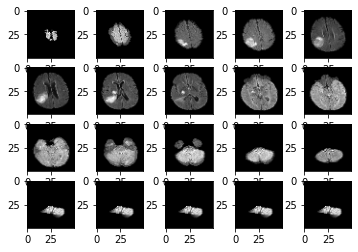

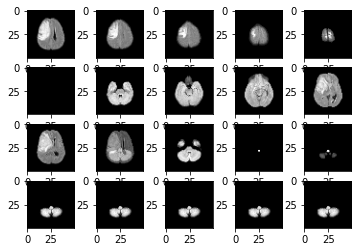

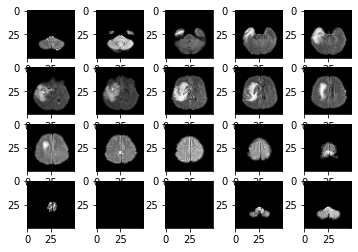

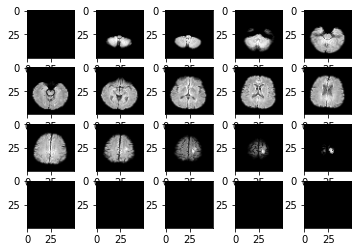

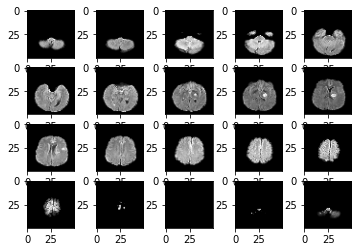

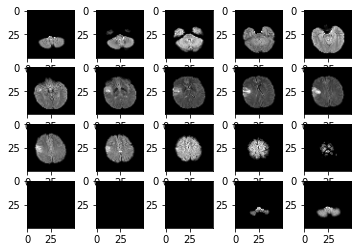

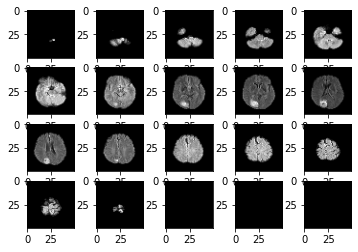

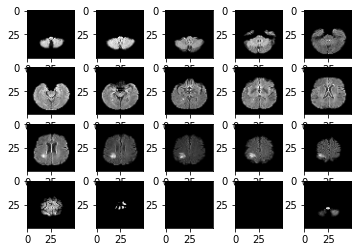

I am done


In [14]:
IMG_PX_SIZE = 50
HM_slices=20
i=0
j=0 
much_data=[]
for scan_type in range(1):
    for patient in patients[100:150]:
        path = data_dir + '/'+ patient + "/" + scan[scan_type]
        slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
        slices.sort(key = lambda x: int(x.ImagePositionPatient[0]))
    #     print(len(slices),label[i],slices[i].pixel_array.shape)
        i+=1

       
        new_slices = []

        slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]

        chunk_sizes =  math.ceil(len(slices)/HM_slices)
    #     print(chunk_sizes)

        for slice_chunk in chunk(slices, chunk_sizes):
    #         print(slice_chunk)
            slice_chunk = list(map(mean,zip(*slice_chunk)))
            new_slices.append(slice_chunk)

        new_slices=resize(new_slices,HM_slices)
#         print(len(new_slices))
        
#         if label[i]==1: label[i]=np.vectorize([0,1])
#         elif label[i]==0: label[i]=np.vectorize([1,0])


        fig = plt.figure()
        for num,each_slice in enumerate(new_slices):
            y = fig.add_subplot(4,5,num+1)
    #         new_image = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
            y.imshow(each_slice,cmap='gray')
    #         y.imshow(each_slice)
    much_data.append(new_slices)
plt.show()
print('I am done')

In [6]:
'''from scipy.ndimage import zoom
IMG_PX_SIZE = 250
i=0
j=0 
for patient in patients[:1]:
    path = data_dir + '/'+ patient + "/" + scan[0]
    slices = [pydicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[0]))
    i+=1
    print(len(slices))
    HM_slices=20
#     new_slices = []
    factor = len(slices)/20
    new_slices = zoom(np.array(slices),(1,1,factor))
    print(type(np.array(slices)))
    print(np.array(slices).shape)
      
#     for slice_chunk in chunk(slices, chunk_sizes):
#         slice_chunk = list(map(mean,zip(*slice_chunk)))
#         new_slices.append(slice_chunk)'''

'from scipy.ndimage import zoom\nIMG_PX_SIZE = 250\ni=0\nj=0 \nfor patient in patients[:1]:\n    path = data_dir + \'/\'+ patient + "/" + scan[0]\n    slices = [pydicom.read_file(path + \'/\' + s) for s in os.listdir(path)]\n    slices.sort(key = lambda x: int(x.ImagePositionPatient[0]))\n    i+=1\n    print(len(slices))\n    HM_slices=20\n#     new_slices = []\n    factor = len(slices)/20\n    new_slices = zoom(np.array(slices),(1,1,factor))\n    print(type(np.array(slices)))\n    print(np.array(slices).shape)\n      \n#     for slice_chunk in chunk(slices, chunk_sizes):\n#         slice_chunk = list(map(mean,zip(*slice_chunk)))\n#         new_slices.append(slice_chunk)'

In [11]:
sample_shape = (16, 16, 16, 3)
#MODEL
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Fit data to model
history = model.fit(much_data, label,
            batch_size=128,
            epochs=40,
            verbose=1,
            validation_split=0.3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 14, 14, 14, 32)    2624      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 7, 7, 7, 32)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 7, 32)       128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 7, 32)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 5, 5, 5, 64)       55360     
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 2, 2, 2, 64)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 2, 2, 2, 64)      

ValueError: in user code:

    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:770 train_step  *
        y_pred = self(x, training=True)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py:197 assert_input_compatibility  *
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_1 expects 1 input(s), but it received 1000 input tensors. Inputs received: [<tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_13:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_14:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_15:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_16:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_17:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_18:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_19:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_20:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_21:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_22:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_23:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_24:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_25:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_26:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_27:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_28:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_29:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_30:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_31:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_32:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_33:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_34:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_35:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_36:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_37:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_38:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_39:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_40:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_41:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_42:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_43:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_44:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_45:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_46:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_47:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_48:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_49:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_50:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_51:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_52:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_53:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_54:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_55:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_56:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_57:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_58:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_59:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_60:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_61:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_62:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_63:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_64:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_65:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_66:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_67:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_68:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_69:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_70:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_71:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_72:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_73:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_74:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_75:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_76:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_77:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_78:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_79:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_80:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_81:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_82:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_83:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_84:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_85:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_86:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_87:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_88:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_89:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_90:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_91:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_92:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_93:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_94:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_95:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_96:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_97:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_98:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_99:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_100:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_101:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_102:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_103:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_104:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_105:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_106:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_107:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_108:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_109:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_110:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_111:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_112:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_113:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_114:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_115:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_116:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_117:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_118:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_119:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_120:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_121:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_122:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_123:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_124:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_125:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_126:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_127:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_128:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_129:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_130:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_131:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_132:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_133:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_134:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_135:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_136:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_137:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_138:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_139:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_140:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_141:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_142:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_143:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_144:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_145:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_146:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_147:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_148:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_149:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_150:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_151:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_152:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_153:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_154:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_155:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_156:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_157:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_158:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_159:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_160:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_161:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_162:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_163:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_164:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_165:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_166:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_167:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_168:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_169:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_170:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_171:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_172:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_173:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_174:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_175:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_176:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_177:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_178:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_179:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_180:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_181:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_182:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_183:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_184:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_185:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_186:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_187:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_188:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_189:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_190:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_191:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_192:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_193:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_194:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_195:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_196:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_197:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_198:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_199:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_200:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_201:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_202:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_203:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_204:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_205:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_206:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_207:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_208:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_209:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_210:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_211:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_212:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_213:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_214:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_215:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_216:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_217:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_218:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_219:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_220:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_221:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_222:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_223:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_224:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_225:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_226:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_227:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_228:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_229:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_230:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_231:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_232:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_233:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_234:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_235:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_236:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_237:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_238:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_239:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_240:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_241:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_242:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_243:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_244:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_245:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_246:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_247:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_248:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_249:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_250:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_251:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_252:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_253:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_254:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_255:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_256:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_257:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_258:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_259:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_260:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_261:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_262:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_263:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_264:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_265:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_266:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_267:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_268:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_269:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_270:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_271:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_272:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_273:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_274:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_275:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_276:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_277:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_278:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_279:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_280:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_281:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_282:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_283:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_284:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_285:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_286:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_287:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_288:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_289:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_290:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_291:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_292:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_293:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_294:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_295:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_296:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_297:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_298:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_299:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_300:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_301:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_302:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_303:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_304:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_305:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_306:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_307:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_308:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_309:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_310:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_311:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_312:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_313:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_314:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_315:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_316:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_317:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_318:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_319:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_320:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_321:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_322:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_323:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_324:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_325:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_326:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_327:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_328:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_329:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_330:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_331:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_332:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_333:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_334:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_335:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_336:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_337:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_338:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_339:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_340:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_341:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_342:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_343:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_344:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_345:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_346:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_347:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_348:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_349:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_350:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_351:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_352:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_353:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_354:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_355:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_356:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_357:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_358:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_359:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_360:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_361:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_362:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_363:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_364:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_365:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_366:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_367:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_368:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_369:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_370:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_371:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_372:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_373:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_374:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_375:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_376:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_377:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_378:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_379:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_380:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_381:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_382:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_383:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_384:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_385:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_386:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_387:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_388:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_389:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_390:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_391:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_392:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_393:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_394:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_395:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_396:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_397:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_398:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_399:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_400:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_401:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_402:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_403:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_404:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_405:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_406:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_407:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_408:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_409:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_410:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_411:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_412:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_413:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_414:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_415:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_416:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_417:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_418:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_419:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_420:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_421:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_422:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_423:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_424:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_425:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_426:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_427:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_428:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_429:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_430:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_431:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_432:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_433:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_434:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_435:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_436:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_437:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_438:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_439:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_440:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_441:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_442:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_443:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_444:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_445:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_446:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_447:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_448:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_449:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_450:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_451:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_452:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_453:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_454:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_455:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_456:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_457:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_458:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_459:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_460:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_461:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_462:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_463:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_464:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_465:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_466:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_467:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_468:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_469:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_470:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_471:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_472:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_473:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_474:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_475:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_476:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_477:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_478:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_479:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_480:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_481:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_482:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_483:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_484:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_485:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_486:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_487:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_488:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_489:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_490:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_491:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_492:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_493:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_494:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_495:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_496:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_497:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_498:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_499:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_500:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_501:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_502:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_503:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_504:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_505:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_506:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_507:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_508:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_509:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_510:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_511:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_512:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_513:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_514:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_515:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_516:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_517:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_518:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_519:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_520:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_521:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_522:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_523:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_524:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_525:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_526:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_527:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_528:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_529:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_530:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_531:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_532:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_533:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_534:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_535:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_536:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_537:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_538:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_539:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_540:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_541:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_542:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_543:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_544:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_545:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_546:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_547:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_548:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_549:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_550:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_551:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_552:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_553:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_554:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_555:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_556:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_557:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_558:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_559:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_560:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_561:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_562:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_563:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_564:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_565:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_566:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_567:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_568:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_569:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_570:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_571:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_572:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_573:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_574:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_575:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_576:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_577:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_578:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_579:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_580:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_581:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_582:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_583:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_584:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_585:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_586:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_587:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_588:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_589:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_590:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_591:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_592:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_593:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_594:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_595:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_596:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_597:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_598:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_599:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_600:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_601:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_602:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_603:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_604:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_605:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_606:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_607:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_608:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_609:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_610:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_611:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_612:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_613:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_614:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_615:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_616:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_617:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_618:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_619:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_620:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_621:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_622:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_623:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_624:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_625:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_626:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_627:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_628:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_629:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_630:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_631:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_632:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_633:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_634:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_635:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_636:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_637:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_638:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_639:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_640:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_641:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_642:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_643:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_644:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_645:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_646:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_647:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_648:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_649:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_650:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_651:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_652:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_653:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_654:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_655:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_656:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_657:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_658:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_659:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_660:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_661:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_662:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_663:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_664:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_665:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_666:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_667:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_668:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_669:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_670:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_671:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_672:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_673:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_674:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_675:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_676:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_677:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_678:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_679:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_680:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_681:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_682:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_683:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_684:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_685:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_686:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_687:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_688:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_689:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_690:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_691:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_692:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_693:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_694:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_695:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_696:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_697:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_698:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_699:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_700:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_701:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_702:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_703:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_704:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_705:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_706:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_707:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_708:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_709:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_710:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_711:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_712:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_713:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_714:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_715:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_716:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_717:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_718:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_719:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_720:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_721:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_722:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_723:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_724:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_725:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_726:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_727:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_728:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_729:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_730:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_731:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_732:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_733:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_734:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_735:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_736:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_737:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_738:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_739:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_740:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_741:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_742:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_743:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_744:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_745:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_746:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_747:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_748:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_749:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_750:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_751:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_752:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_753:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_754:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_755:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_756:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_757:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_758:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_759:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_760:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_761:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_762:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_763:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_764:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_765:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_766:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_767:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_768:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_769:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_770:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_771:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_772:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_773:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_774:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_775:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_776:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_777:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_778:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_779:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_780:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_781:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_782:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_783:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_784:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_785:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_786:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_787:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_788:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_789:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_790:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_791:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_792:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_793:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_794:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_795:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_796:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_797:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_798:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_799:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_800:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_801:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_802:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_803:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_804:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_805:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_806:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_807:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_808:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_809:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_810:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_811:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_812:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_813:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_814:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_815:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_816:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_817:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_818:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_819:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_820:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_821:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_822:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_823:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_824:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_825:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_826:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_827:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_828:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_829:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_830:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_831:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_832:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_833:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_834:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_835:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_836:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_837:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_838:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_839:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_840:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_841:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_842:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_843:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_844:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_845:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_846:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_847:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_848:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_849:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_850:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_851:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_852:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_853:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_854:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_855:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_856:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_857:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_858:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_859:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_860:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_861:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_862:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_863:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_864:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_865:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_866:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_867:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_868:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_869:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_870:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_871:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_872:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_873:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_874:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_875:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_876:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_877:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_878:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_879:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_880:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_881:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_882:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_883:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_884:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_885:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_886:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_887:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_888:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_889:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_890:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_891:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_892:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_893:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_894:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_895:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_896:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_897:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_898:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_899:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_900:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_901:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_902:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_903:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_904:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_905:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_906:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_907:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_908:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_909:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_910:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_911:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_912:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_913:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_914:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_915:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_916:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_917:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_918:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_919:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_920:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_921:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_922:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_923:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_924:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_925:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_926:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_927:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_928:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_929:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_930:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_931:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_932:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_933:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_934:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_935:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_936:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_937:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_938:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_939:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_940:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_941:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_942:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_943:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_944:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_945:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_946:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_947:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_948:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_949:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_950:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_951:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_952:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_953:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_954:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_955:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_956:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_957:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_958:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_959:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_960:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_961:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_962:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_963:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_964:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_965:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_966:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_967:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_968:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_969:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_970:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_971:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_972:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_973:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_974:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_975:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_976:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_977:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_978:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_979:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_980:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_981:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_982:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_983:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_984:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_985:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_986:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_987:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_988:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_989:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_990:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_991:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_992:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_993:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_994:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_995:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_996:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_997:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_998:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_999:0' shape=(None, 1) dtype=float32>]


In [8]:
# len(new_slices)
label


0      1
1      1
2      0
3      1
4      1
      ..
580    1
581    1
582    1
583    0
584    0
Name: MGMT_value, Length: 585, dtype: int64